In [600]:
import anndata as ad
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as plt


In [601]:
adata = ad.read_h5ad("/scratch/bvdberg/SoloTE/scripts/whitelisted_bonemarrow.h5ad")


AnnData object with n_obs × n_vars = 14434 × 529167
    obs: 'nCount_RNA', 'nFeature_RNA', 'sampleID', 'tissue', 'model', 'age', 'model_age', 'mouseID', 'doublet_scores', 'percent.mt', 'percent.ribo', 'percent.hb', 'percent.hist', 'S.Score', 'G2M.Score', 'group_umap_sub', 'annotation_lv0', 'annotation_lv1', 'annotation_lv2', 'annotation_lv3', 'phase'
    var: 'te_type'
te_type
SINE    263320
LINE    113452
LTR     108891
GENE     24972
DNA      18492
RC          40
Name: count, dtype: int64


<Axes: ylabel='count'>

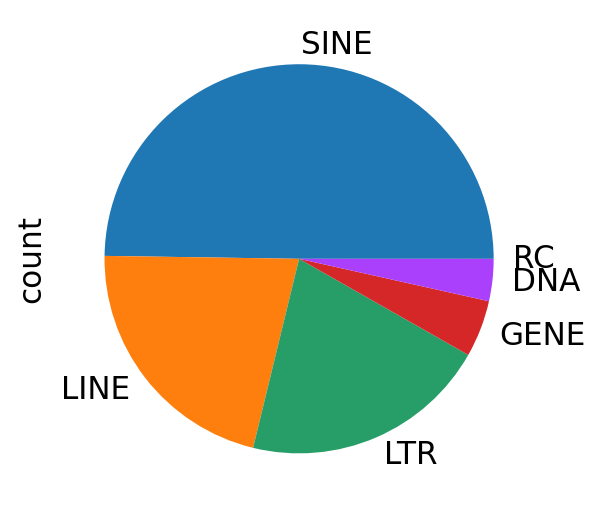

In [602]:
print(adata)
te_counts = adata.var["te_type"].value_counts()
print(te_counts)
te_counts.plot.pie(autopct='%1.1f%%', explode=(0, 0.1, 0.1, 0.1, 0.1, 0.1))


In [603]:
results_file = "anno_Bmarrow.h5ad"  # the file that will store the analysis results


In [604]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")


scanpy==1.9.5 anndata==0.9.2 umap==0.5.3 numpy==1.24.4 scipy==1.11.3 pandas==2.1.1 scikit-learn==1.3.1 statsmodels==0.14.0 igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.10


In [605]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`


normalizing counts per cell
    finished (0:00:00)


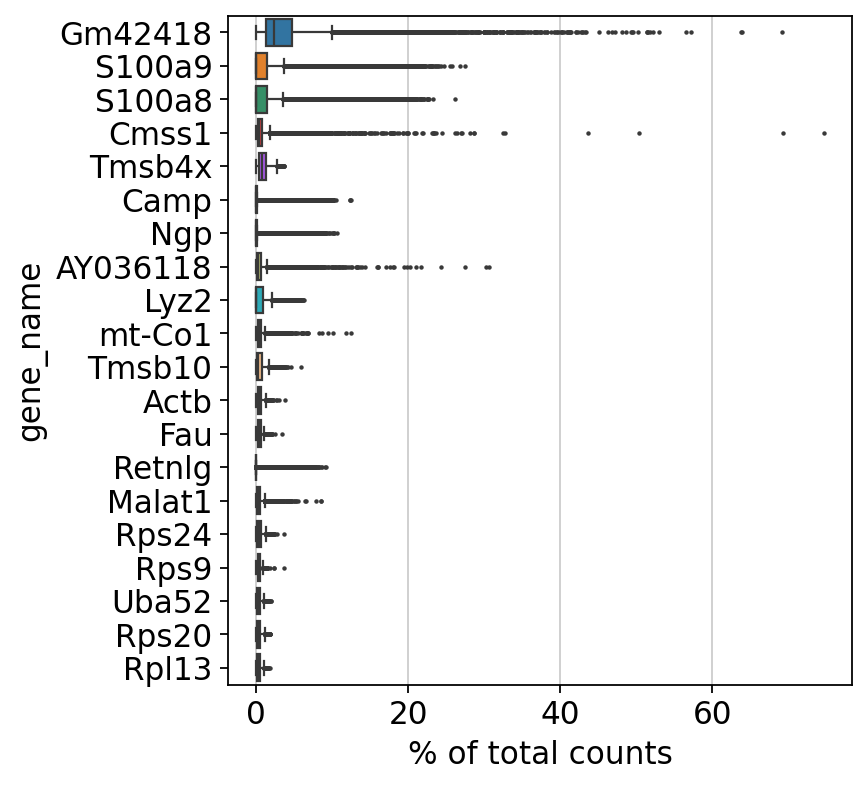

In [606]:
sc.pl.highest_expr_genes(
    adata,
    n_top=20,
)


In [607]:
sc.pp.filter_genes(adata, min_cells=3)
adata


filtered out 381834 genes that are detected in less than 3 cells


/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


AnnData object with n_obs × n_vars = 14434 × 147333
    obs: 'nCount_RNA', 'nFeature_RNA', 'sampleID', 'tissue', 'model', 'age', 'model_age', 'mouseID', 'doublet_scores', 'percent.mt', 'percent.ribo', 'percent.hb', 'percent.hist', 'S.Score', 'G2M.Score', 'group_umap_sub', 'annotation_lv0', 'annotation_lv1', 'annotation_lv2', 'annotation_lv3', 'phase'
    var: 'te_type', 'n_cells'

In [608]:
adata.var["te_type"].value_counts()


te_type
SINE    69568
LTR     27483
LINE    25595
GENE    20508
DNA      4168
RC         11
Name: count, dtype: int64

In [609]:
adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)


/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


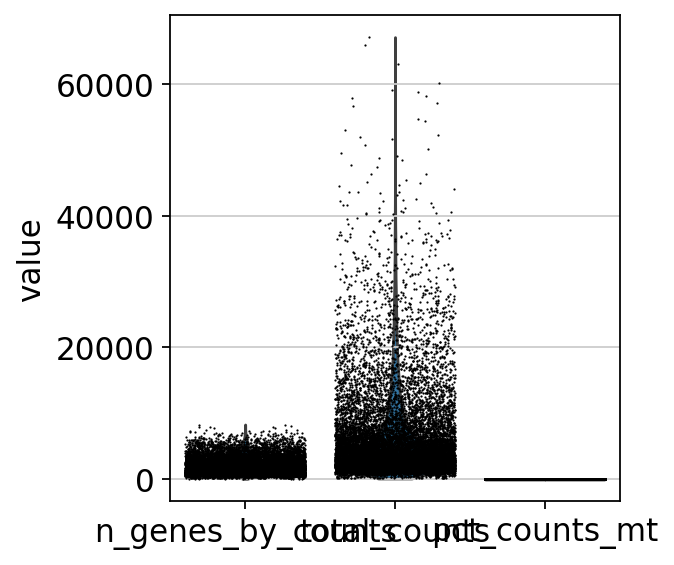

In [610]:
sc.pl.violin(adata, ["n_genes_by_counts", "total_counts", "pct_counts_mt"], jitter=0.4)


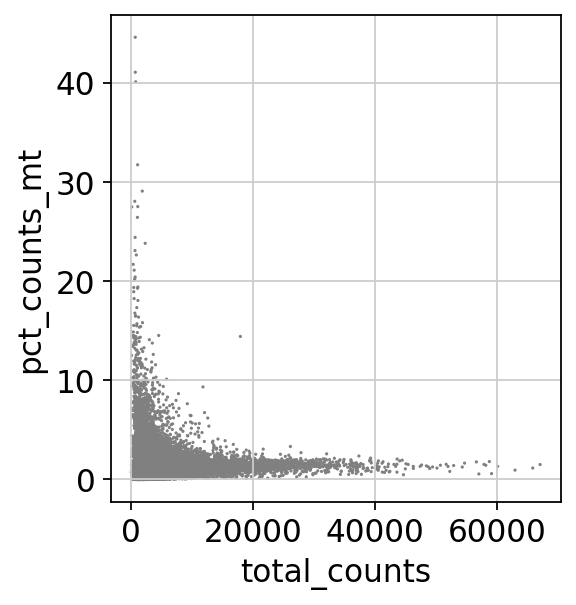

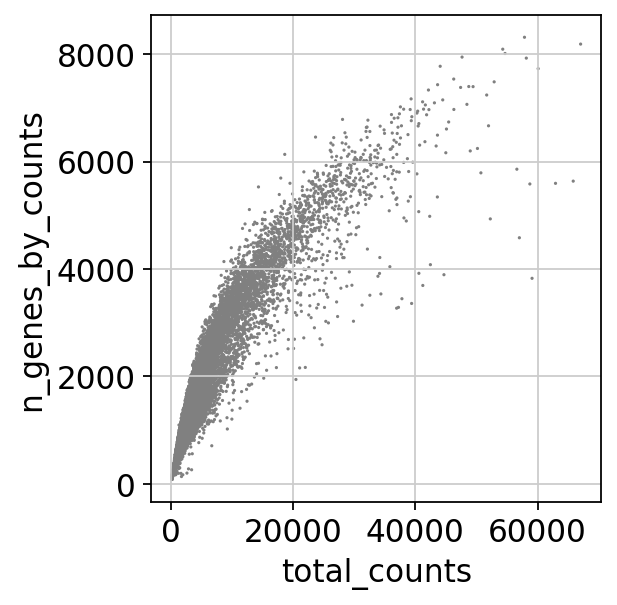

In [611]:
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")


In [612]:
sc.pp.normalize_total(adata, target_sum=1e4)


normalizing counts per cell
    finished (0:00:00)


In [613]:
sc.pp.log1p(adata)


In [614]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)


extracting highly variable genes


/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


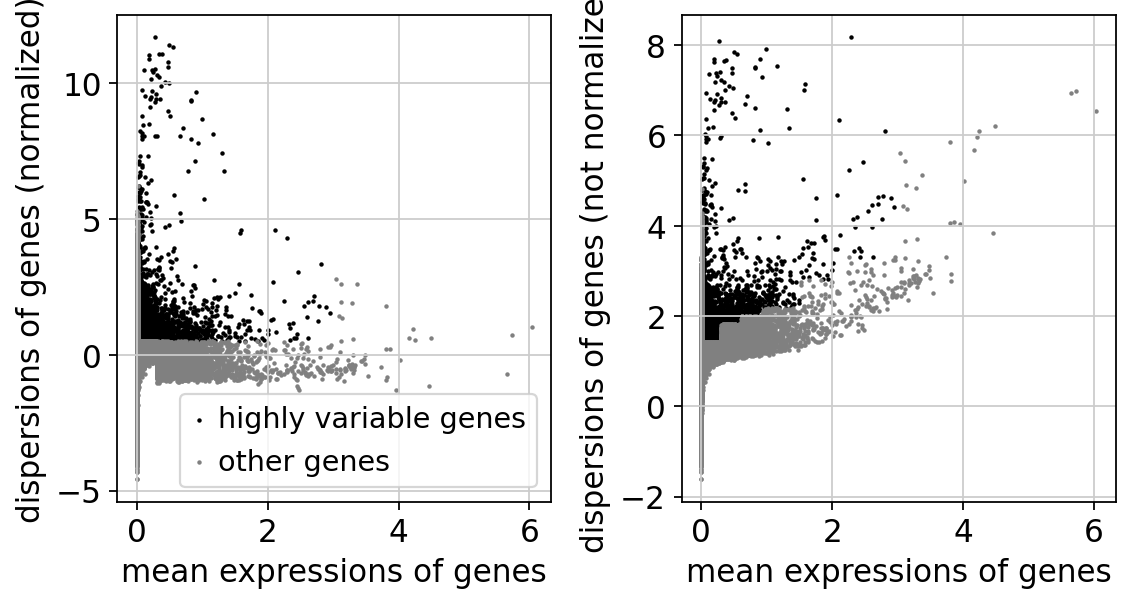

In [615]:
sc.pl.highly_variable_genes(adata)


In [616]:
adata.raw = adata
adata


AnnData object with n_obs × n_vars = 14434 × 147333
    obs: 'nCount_RNA', 'nFeature_RNA', 'sampleID', 'tissue', 'model', 'age', 'model_age', 'mouseID', 'doublet_scores', 'percent.mt', 'percent.ribo', 'percent.hb', 'percent.hist', 'S.Score', 'G2M.Score', 'group_umap_sub', 'annotation_lv0', 'annotation_lv1', 'annotation_lv2', 'annotation_lv3', 'phase', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'te_type', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [617]:
adata = adata[:, adata.var.highly_variable]
adata


/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


View of AnnData object with n_obs × n_vars = 14434 × 5961
    obs: 'nCount_RNA', 'nFeature_RNA', 'sampleID', 'tissue', 'model', 'age', 'model_age', 'mouseID', 'doublet_scores', 'percent.mt', 'percent.ribo', 'percent.hb', 'percent.hist', 'S.Score', 'G2M.Score', 'group_umap_sub', 'annotation_lv0', 'annotation_lv1', 'annotation_lv2', 'annotation_lv3', 'phase', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'te_type', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [618]:
sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])


regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use


/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:619: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if keys[0] in adata.obs_keys() and is_categorical_dtype(adata.obs[keys[0]]):


    finished (0:02:15)


In [619]:
sc.pp.scale(adata, max_value=10)


In [620]:
sc.tl.pca(adata, svd_solver="arpack")


computing PCA
    on highly variable genes
    with n_comps=50


/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


    finished (0:00:10)


/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


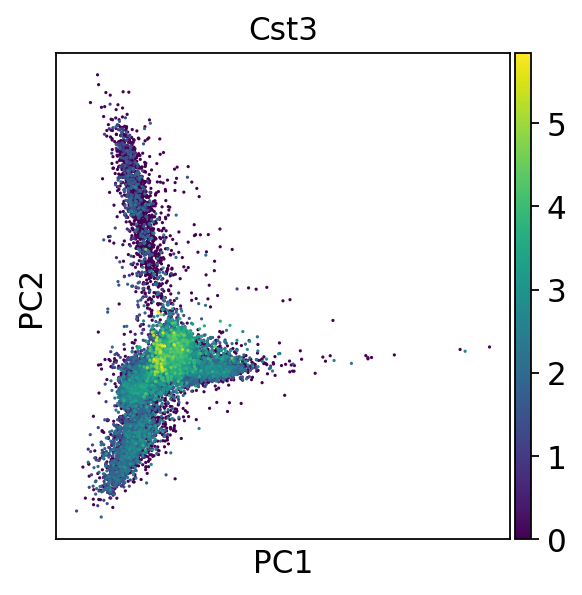

In [621]:
sc.pl.pca(adata, color="Cst3")


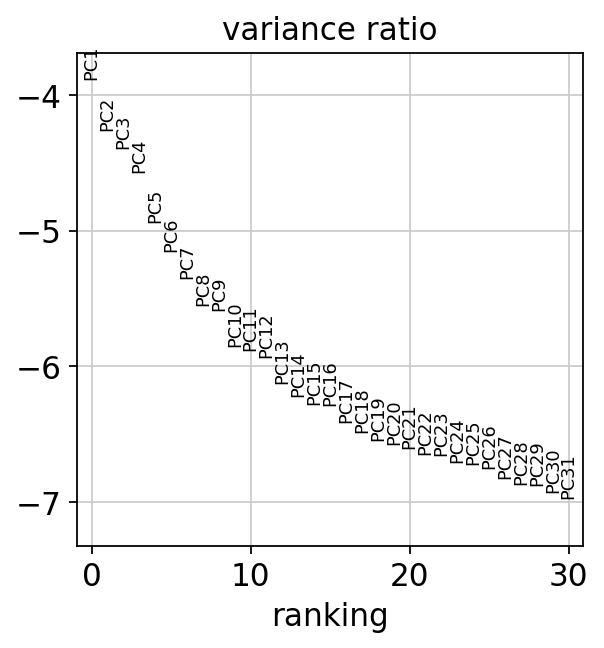

In [622]:
sc.pl.pca_variance_ratio(adata, log=True)


In [623]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)


computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)


In [624]:
sc.tl.louvain(adata)


running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 25 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:01)


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


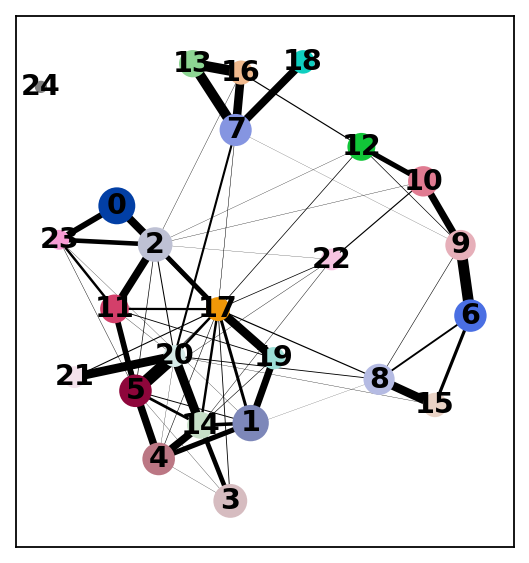

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


In [625]:
sc.tl.paga(adata)
sc.pl.paga(adata)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos="paga")


In [626]:
sc.tl.umap(adata)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


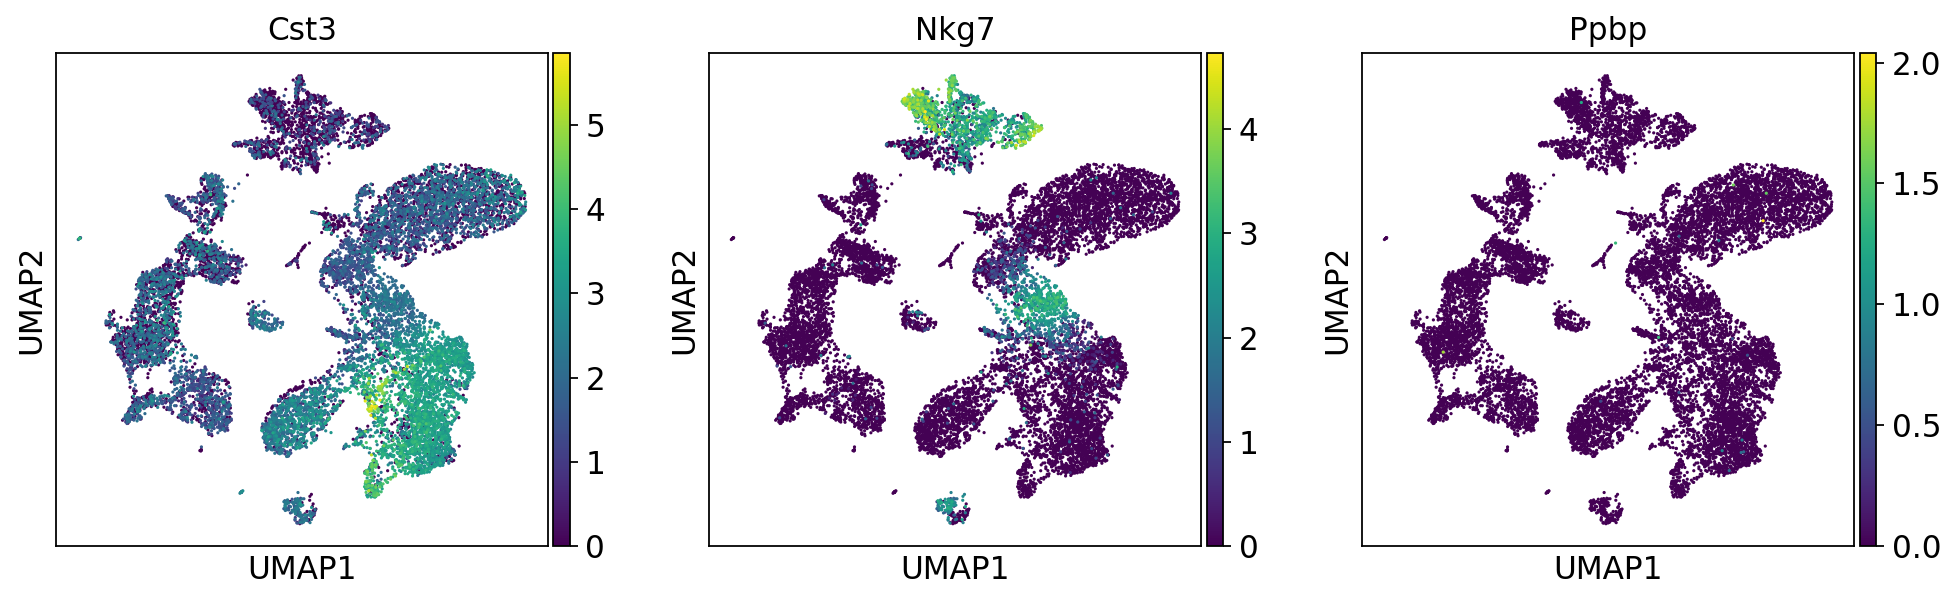

In [627]:
sc.pl.umap(
    adata, color=["Cst3", "Nkg7", "Ppbp"]
)  # with color=["gene name"] you can color specific genes


/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


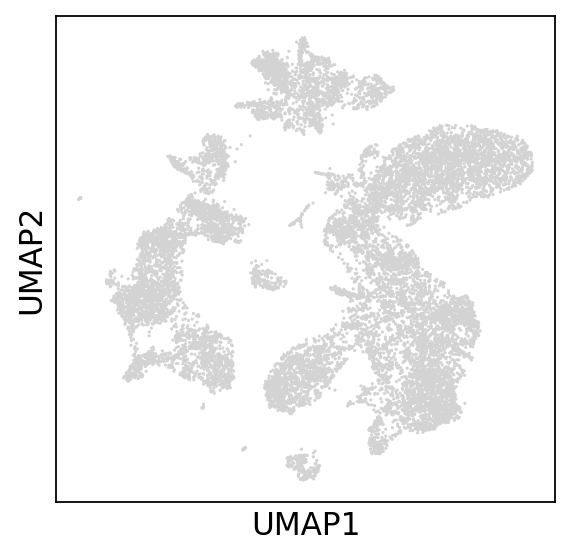

In [628]:
sc.pl.umap(adata, use_raw=False)


In [629]:
sc.tl.leiden(adata)


running Leiden clustering
    finished: found 33 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


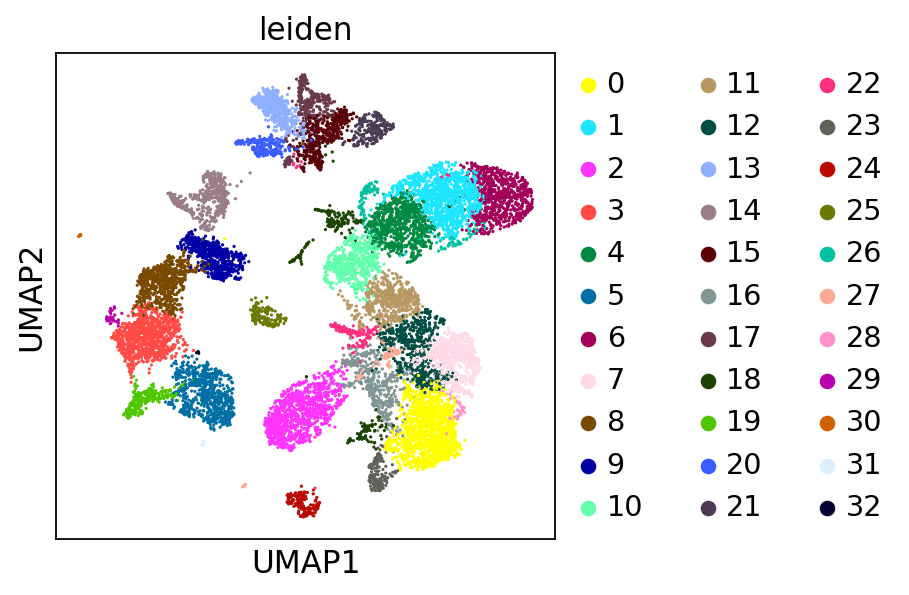

In [630]:
sc.pl.umap(adata, color="leiden")


In [631]:
sc.settings.verbosity = 2  # reduce the verbosity


ranking genes


/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.

    finished (0:00:13)


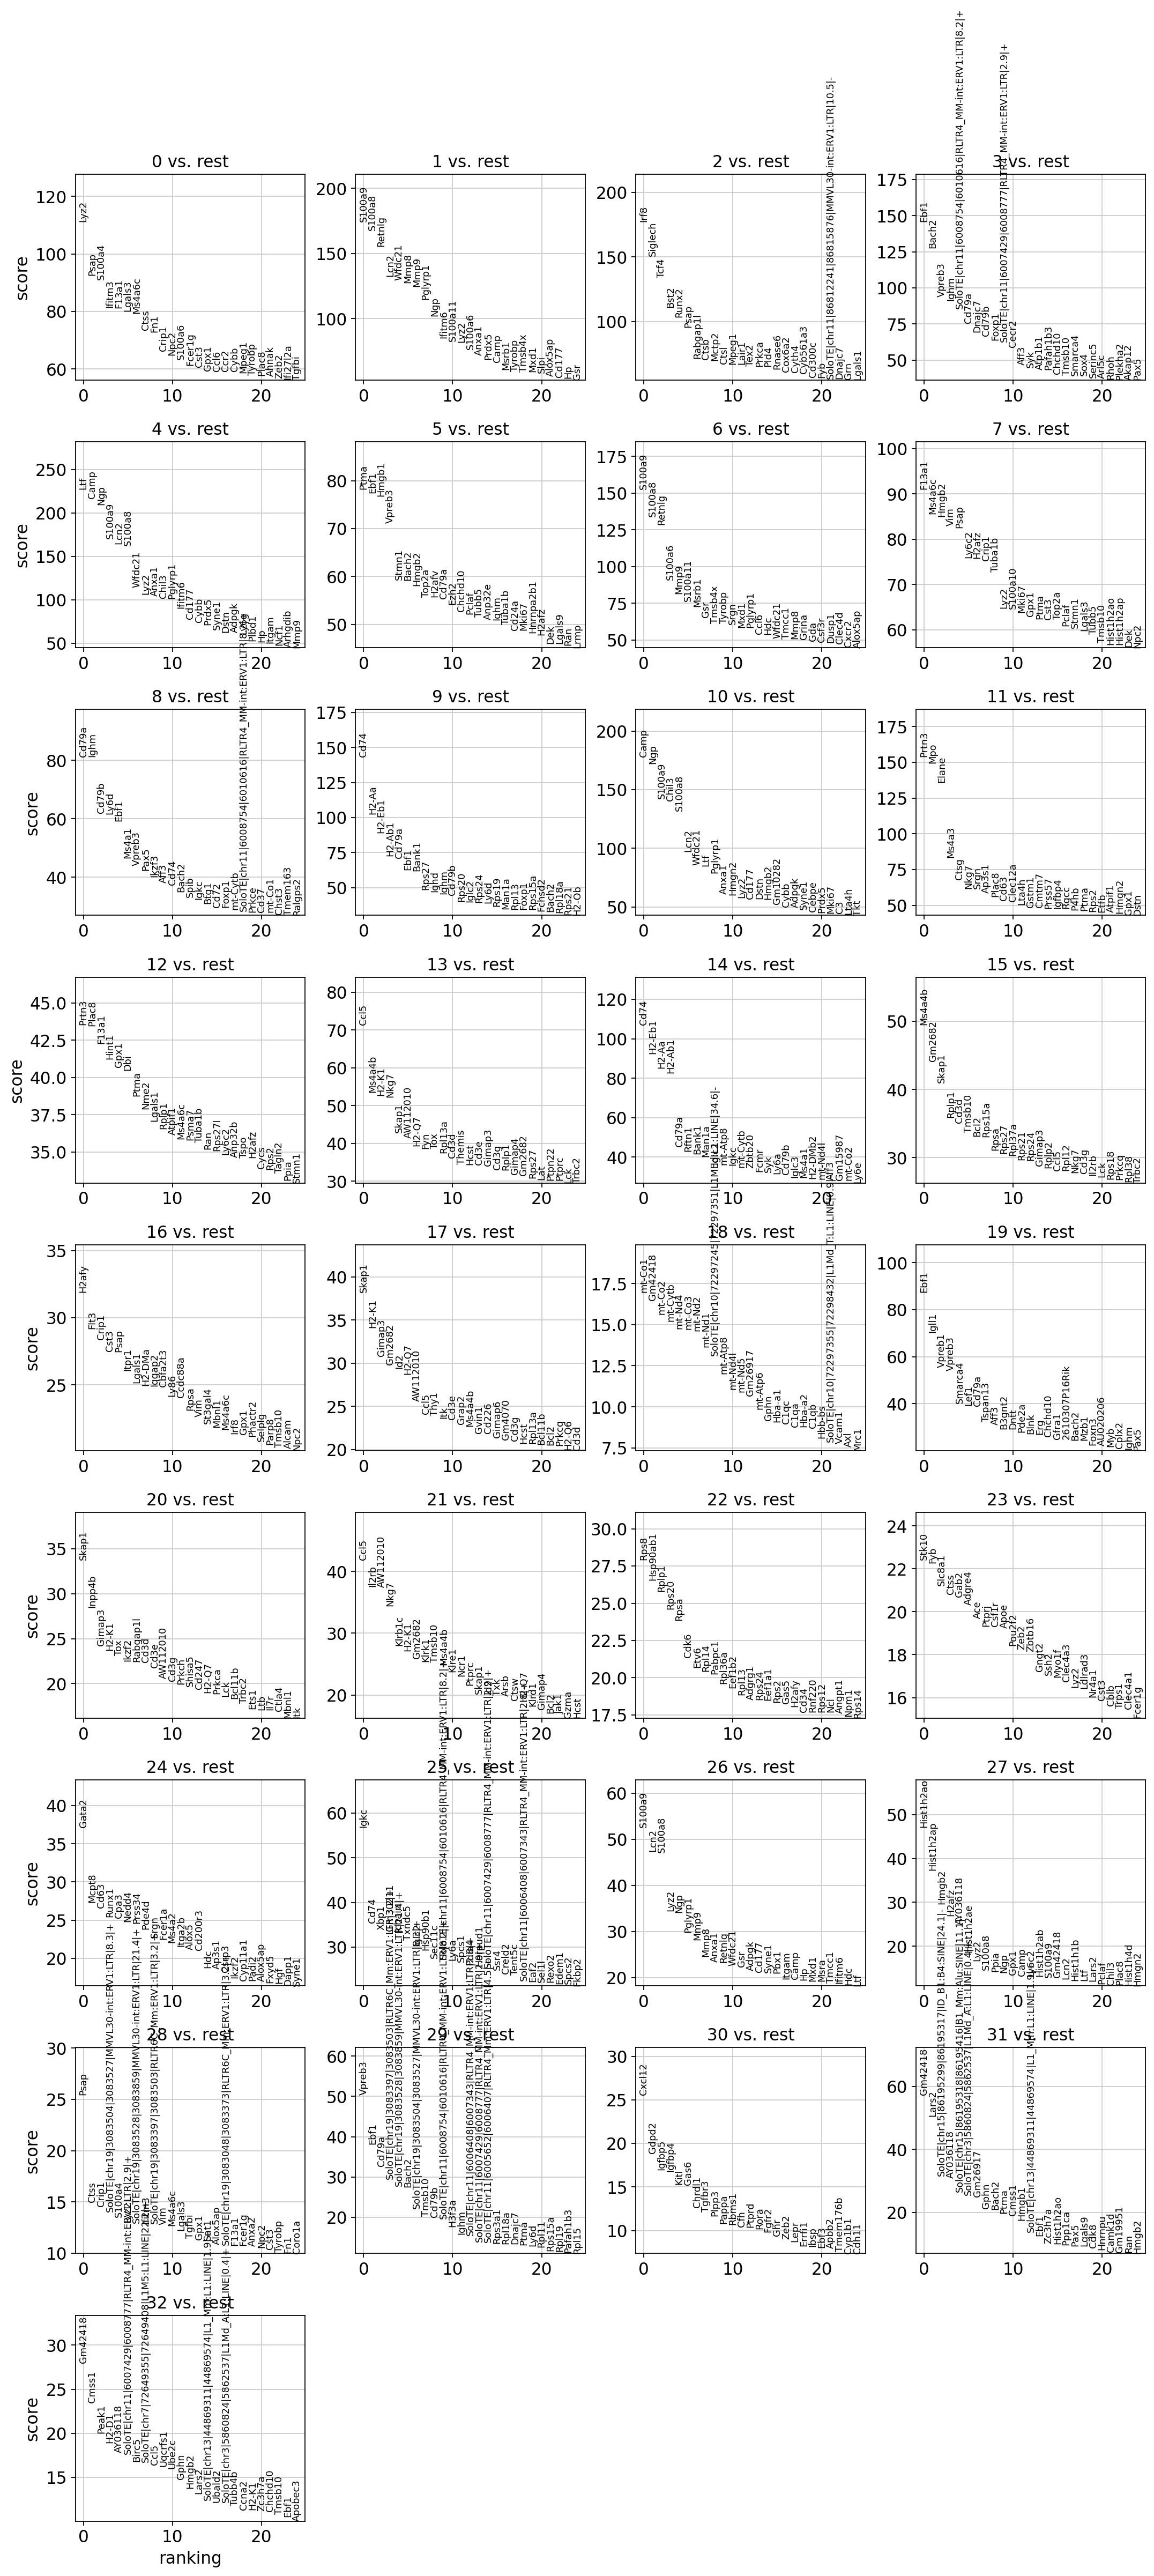

In [632]:
sc.tl.rank_genes_groups(adata, "leiden", method="t-test")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)


ranking genes


/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the res

    finished (0:02:14)


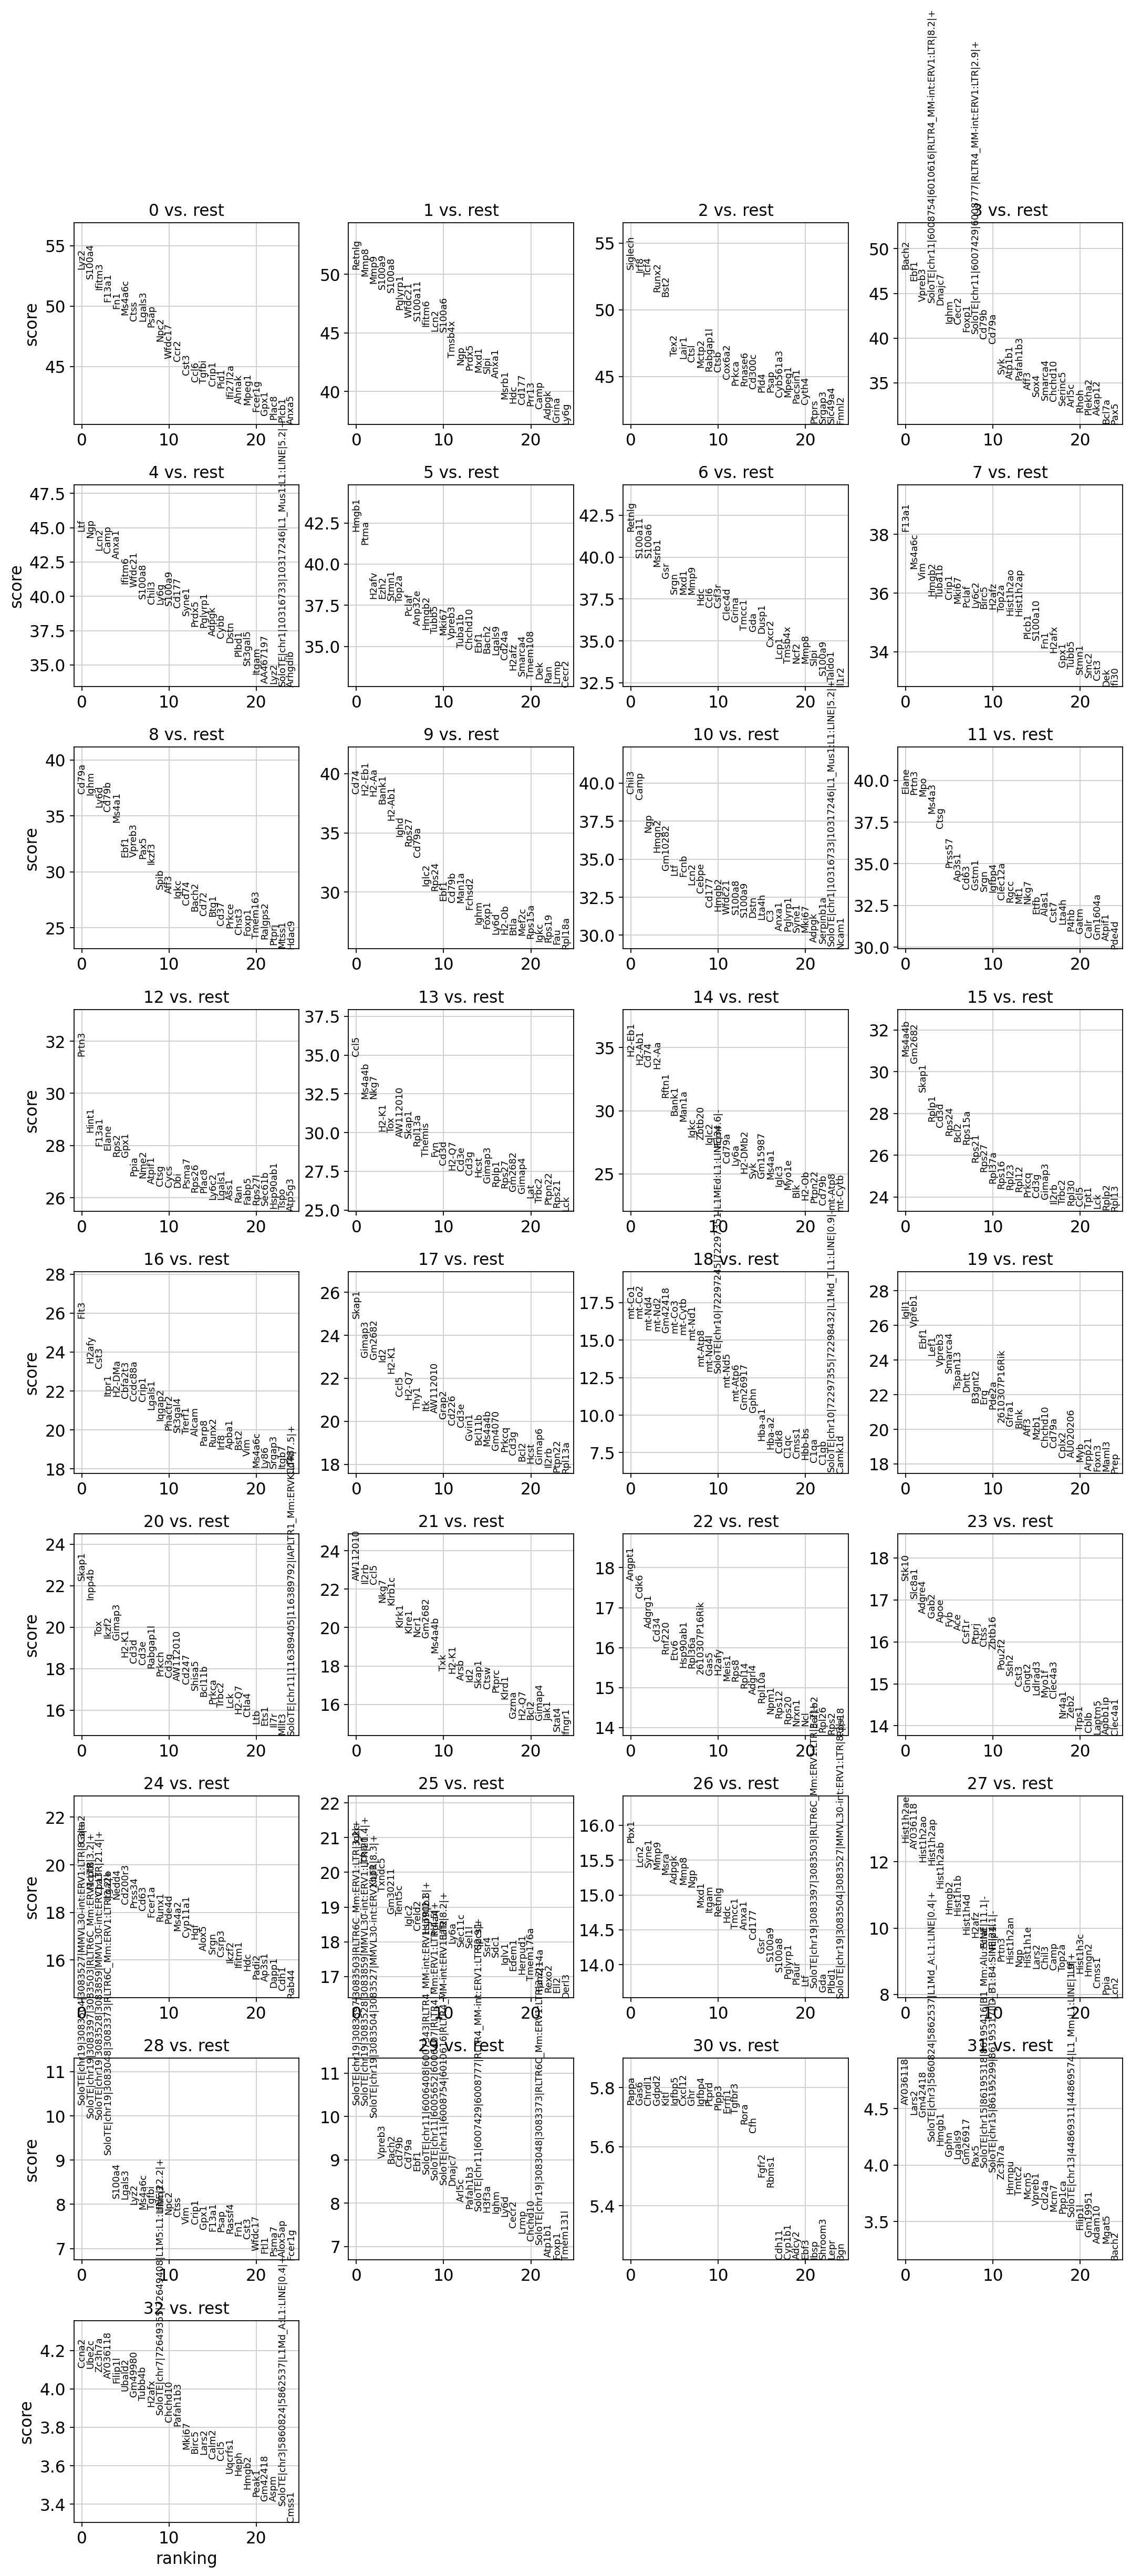

In [633]:
sc.tl.rank_genes_groups(adata, "leiden", method="wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)


In [634]:
adata.write(results_file)


In [635]:
sc.tl.rank_genes_groups(adata, "leiden", method="logreg")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)


ranking genes


KeyboardInterrupt: 

In [636]:
# ['Agr2', 'Alpi', 'Cd207', 'Chga', 'Chgb', 'Cspg4', 'Cyp2c55', 'Dct', 'Inv', 'Krt1', 'Krt14', 'Krt5', 'Mlana', 'Msln', 'Muc2', 'Sftpc', 'Sox9', 'Tac1', 'Tph1']
marker_genes = [
    "Cd19",
    "Fcer2a",
    "Cd80",
    "Nt5e",
    "Jchain",
    "Prdm1",
    "Sdc1",
    "Vpreb3",
    "Cd4",
    "Cd44",
    "Cd8a",
    "Sell",
    "Ccr7",
    "Mki67",
    "Ncr1",
    "Gzma",
    "Gata3",
    "Trdc",
    "Cd34",
    "Hlf",
    "Sox4",
    "Klf4",
    "Cst3",
    "Ly6c2",
    "Itgax",
    "Siglech",
    "Mpo",
    "Prtn3",
    "Elane",
    "Cebpe",
    "S100a8",
    "Csf3r",
    "Mcpt8",
    "Prss34",
    "Fcer1a",
    "Adgre1",
    "Marco",
    # "Cd207",
    "Pecam1",
    "Cdh5",
    "Mmrn1",
    "Prox1",
    "Acta2",
    # "Cspg4",
    # "Msln",
    "Lrrn4",
    "Upk3b",
    "Col1a1",
    "Dcn",
    "Pdgfra",
    # "Cyp2c55",
    "Car1",
    "Ethe1",
    "Selenbp1",
    "Apoa1",
    # "Alpi",
    # "Chga",
    # "Chgb",
    # "Tac1",
    # "Tph1",
    "Dclk1",
    "Avil",
    # "Muc2",
    "Tff3",
    # "Agr2",
    "Ascl2",
    "Lgr5",
    # "Krt5",
    # "Krt14",
    # "Krt1",
    "Krt10",
    "Cldn4",
    # "Inv",
    "Lrig1",
    "Plet1",
    # "Sox9",
    "Mgst1",
    "Hopx",
    "Clic5",
    "Sftpb",
    # "Sftpc",
    # "Dct",
    "Pmel",
    # "Mlana",
    "S100b",
]


In [637]:
adata = sc.read(results_file)


In [638]:
pd.DataFrame(adata.uns["rank_genes_groups"]["names"]).head(5)


0       1        2                                                  3  \
0    Lyz2  Retnlg  Siglech                                              Bach2   
1  S100a4    Mmp8     Irf8                                               Ebf1   
2  Ifitm3    Mmp9     Tcf4                                             Vpreb3   
3   F13a1  S100a9    Runx2  SoloTE|chr11|6008754|6010616|RLTR4_MM-int:ERV1...   
4     Fn1  S100a8     Bst2                                             Dnajc7   

       4      5        6       7      8       9  ...      23      24       25  \
0    Ltf  Hmgb1   Retnlg   F13a1  Cd79a    Cd74  ...   Stk10   Gata2     Igkc   
1    Ngp   Ptma  S100a11  Ms4a6c   Ighm  H2-Eb1  ...  Slc8a1   Mcpt8   Jchain   
2   Lcn2  H2afv   S100a6     Vim   Ly6d   H2-Aa  ...  Adgre4    Cpa3     Xbp1   
3   Camp   Ezh2    Msrb1   Hmgb2  Cd79b   Bank1  ...    Gab2  Itga2b   Txndc5   
4  Anxa1  Stmn1      Gsr  Tuba1b  Ms4a1  H2-Ab1  ...    Apoe   Nedd4  Gm30211   

      26         27                                                 28  \
0   Pbx1  Hist1h2ae  SoloTE|chr19|3083504|3083527|MMVL30-int:ERV1:L...   
1   Lcn2   AY036118  SoloTE|chr19|3083397|3083503|RLTR6C_Mm:ERV1:LT...   
2  Syne1  Hist1h2ao  SoloTE|chr19|3083528|3083859|MMVL30-int:ERV1:L...   
3   Mmp9  Hist1h2ap  SoloTE|chr19|3083048|3083373|RLTR6C_Mm:ERV1:LT...   
4   Msra  Hist1h2ab                                             S100a4   

                                                  29      30  \
0  SoloTE|chr19|3083397|3083503|RLTR6C_Mm:ERV1:LT...   Pappa   
1  SoloTE|chr19|3083528|3083859|MMVL30-int:ERV1:L...    Gas6   
2  SoloTE|chr19|3083504|3083527|MMVL30-int:ERV1:L...  Chrdl1   
3                                             Vpreb3   Gdpd2   
4                                              Bach2    Kitl   

                                                 31        32  
0                                          AY036118     Ccna2  
1                                             Lars2     Ube2c  
2                                           Gm42418    Zc3h7a  
3  SoloTE|chr3|5860824|5862537|L1Md_A:L1:LINE|0.4|+  AY036118  
4                                             Hmgb1   Filip1l  

[5 rows x 33 columns]

In [639]:
result = adata.uns["rank_genes_groups"]
groups = result["names"].dtype.names
pd.DataFrame(
    {
        group + "_" + key[:1]: result[key][group]
        for group in groups
        for key in ["names", "pvals"]
    }
).head(5)


0_n  0_p     1_n  1_p      2_n  2_p  \
0    Lyz2  0.0  Retnlg  0.0  Siglech  0.0   
1  S100a4  0.0    Mmp8  0.0     Irf8  0.0   
2  Ifitm3  0.0    Mmp9  0.0     Tcf4  0.0   
3   F13a1  0.0  S100a9  0.0    Runx2  0.0   
4     Fn1  0.0  S100a8  0.0     Bst2  0.0   

                                                 3_n  3_p    4_n  4_p  ...  \
0                                              Bach2  0.0    Ltf  0.0  ...   
1                                               Ebf1  0.0    Ngp  0.0  ...   
2                                             Vpreb3  0.0   Lcn2  0.0  ...   
3  SoloTE|chr11|6008754|6010616|RLTR4_MM-int:ERV1...  0.0   Camp  0.0  ...   
4                                             Dnajc7  0.0  Anxa1  0.0  ...   

                                                28_n          28_p  \
0  SoloTE|chr19|3083504|3083527|MMVL30-int:ERV1:L...  1.169171e-24   
1  SoloTE|chr19|3083397|3083503|RLTR6C_Mm:ERV1:LT...  2.165674e-23   
2  SoloTE|chr19|3083528|3083859|MMVL30-int:ERV1:L...  3.219152e-23   
3  SoloTE|chr19|3083048|3083373|RLTR6C_Mm:ERV1:LT...  7.384586e-20   
4                                             S100a4  3.763971e-16   

                                                29_n          29_p    30_n  \
0  SoloTE|chr19|3083397|3083503|RLTR6C_Mm:ERV1:LT...  9.770673e-25   Pappa   
1  SoloTE|chr19|3083528|3083859|MMVL30-int:ERV1:L...  1.073780e-24    Gas6   
2  SoloTE|chr19|3083504|3083527|MMVL30-int:ERV1:L...  1.826671e-23  Chrdl1   
3                                             Vpreb3  1.628810e-19   Gdpd2   
4                                              Bach2  4.696220e-19    Kitl   

           30_p                                              31_n      31_p  \
0  9.346849e-09                                          AY036118  0.000006   
1  9.350847e-09                                             Lars2  0.000009   
2  9.354846e-09                                           Gm42418  0.000010   
3  9.354846e-09  SoloTE|chr3|5860824|5862537|L1Md_A:L1:LINE|0.4|+  0.000025   
4  9.358847e-09                                             Hmgb1  0.000030   

       32_n      32_p  
0     Ccna2  0.000039  
1     Ube2c  0.000040  
2    Zc3h7a  0.000043  
3  AY036118  0.000050  
4   Filip1l  0.000056  

[5 rows x 66 columns]

ranking genes


/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished (0:00:16)


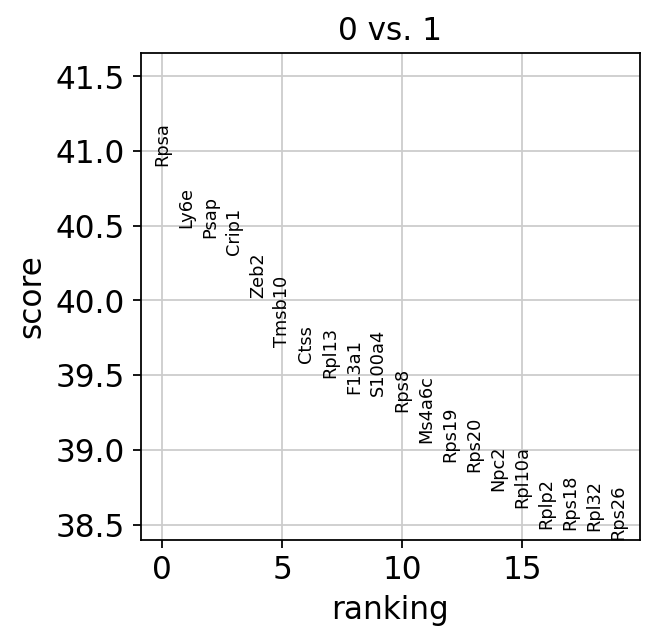

In [640]:
sc.tl.rank_genes_groups(adata, "leiden", groups=["0"], reference="1", method="wilcoxon")
sc.pl.rank_genes_groups(adata, groups=["0"], n_genes=20)


/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1170: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  _ax = sns.violinplot(
/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1183: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  _ax = sns.stripplot(
/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


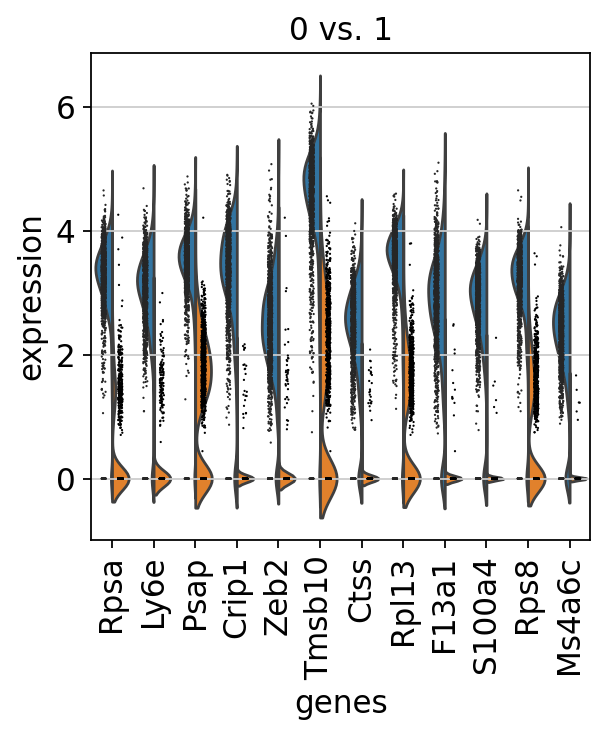

In [641]:
sc.pl.rank_genes_groups_violin(adata, groups="0", n_genes=12)


In [642]:
adata = sc.read(results_file)


/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1170: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  _ax = sns.violinplot(
/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1183: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  _ax = sns.stripplot(
/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


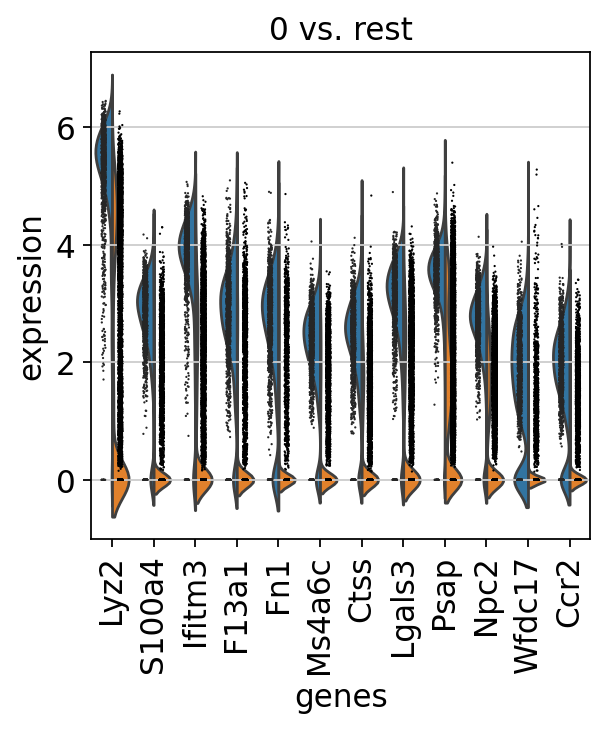

In [643]:
sc.pl.rank_genes_groups_violin(adata, groups="0", n_genes=12)


In [644]:
adata


AnnData object with n_obs × n_vars = 14434 × 5961
    obs: 'nCount_RNA', 'nFeature_RNA', 'sampleID', 'tissue', 'model', 'age', 'model_age', 'mouseID', 'doublet_scores', 'percent.mt', 'percent.ribo', 'percent.hb', 'percent.hist', 'S.Score', 'G2M.Score', 'group_umap_sub', 'annotation_lv0', 'annotation_lv1', 'annotation_lv2', 'annotation_lv3', 'phase', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'louvain', 'leiden'
    var: 'te_type', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'louvain', 'louvain_colors', 'louvain_sizes', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

Passing `palette` w

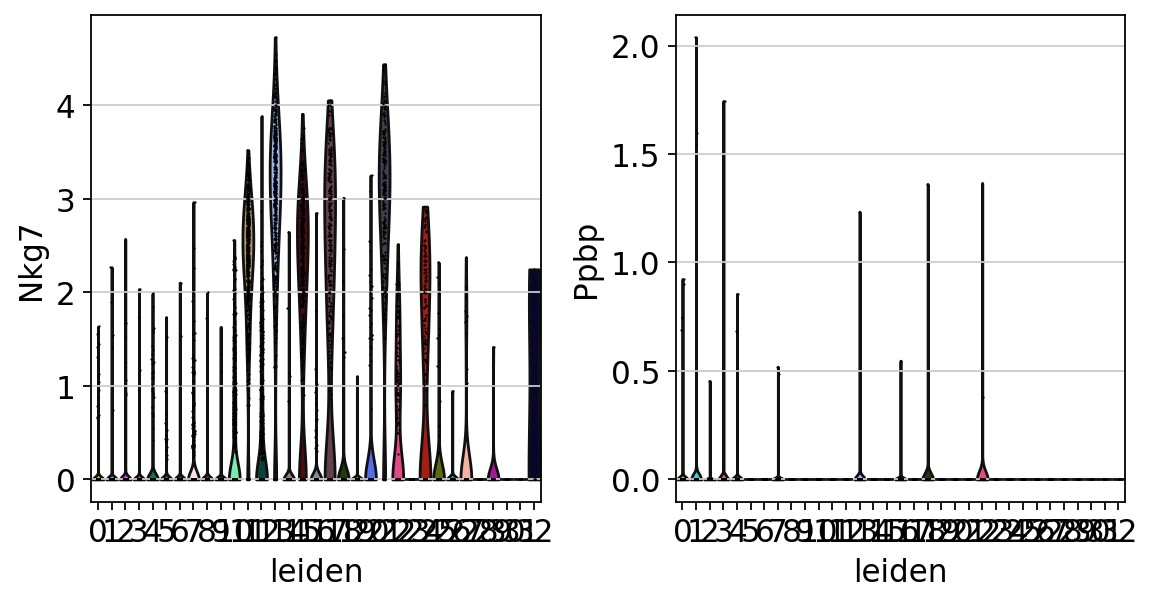

In [645]:
sc.pl.violin(adata, keys=["Nkg7", "Ppbp"], groupby="leiden")


In [646]:
# new_cluster_names = [
#     "CD4 T",
#     "CD14 Monocytes",
#     "B",
#     "CD8 T",
#     "NK",
#     "FCGR3A Monocytes",
#     "Dendritic",
#     "Megakaryocytes",
# ]
# adata.rename_categories("leiden", new_cluster_names)


/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


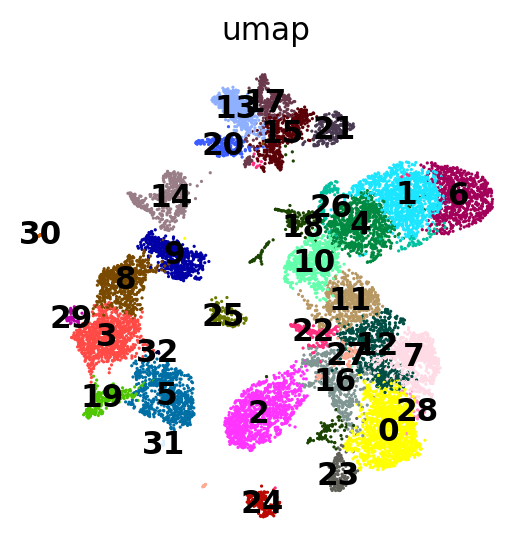

In [647]:
sc.pl.umap(
    adata,
    color="leiden",
    legend_loc="on data",
    title="umap",
    frameon=False,
)


/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored

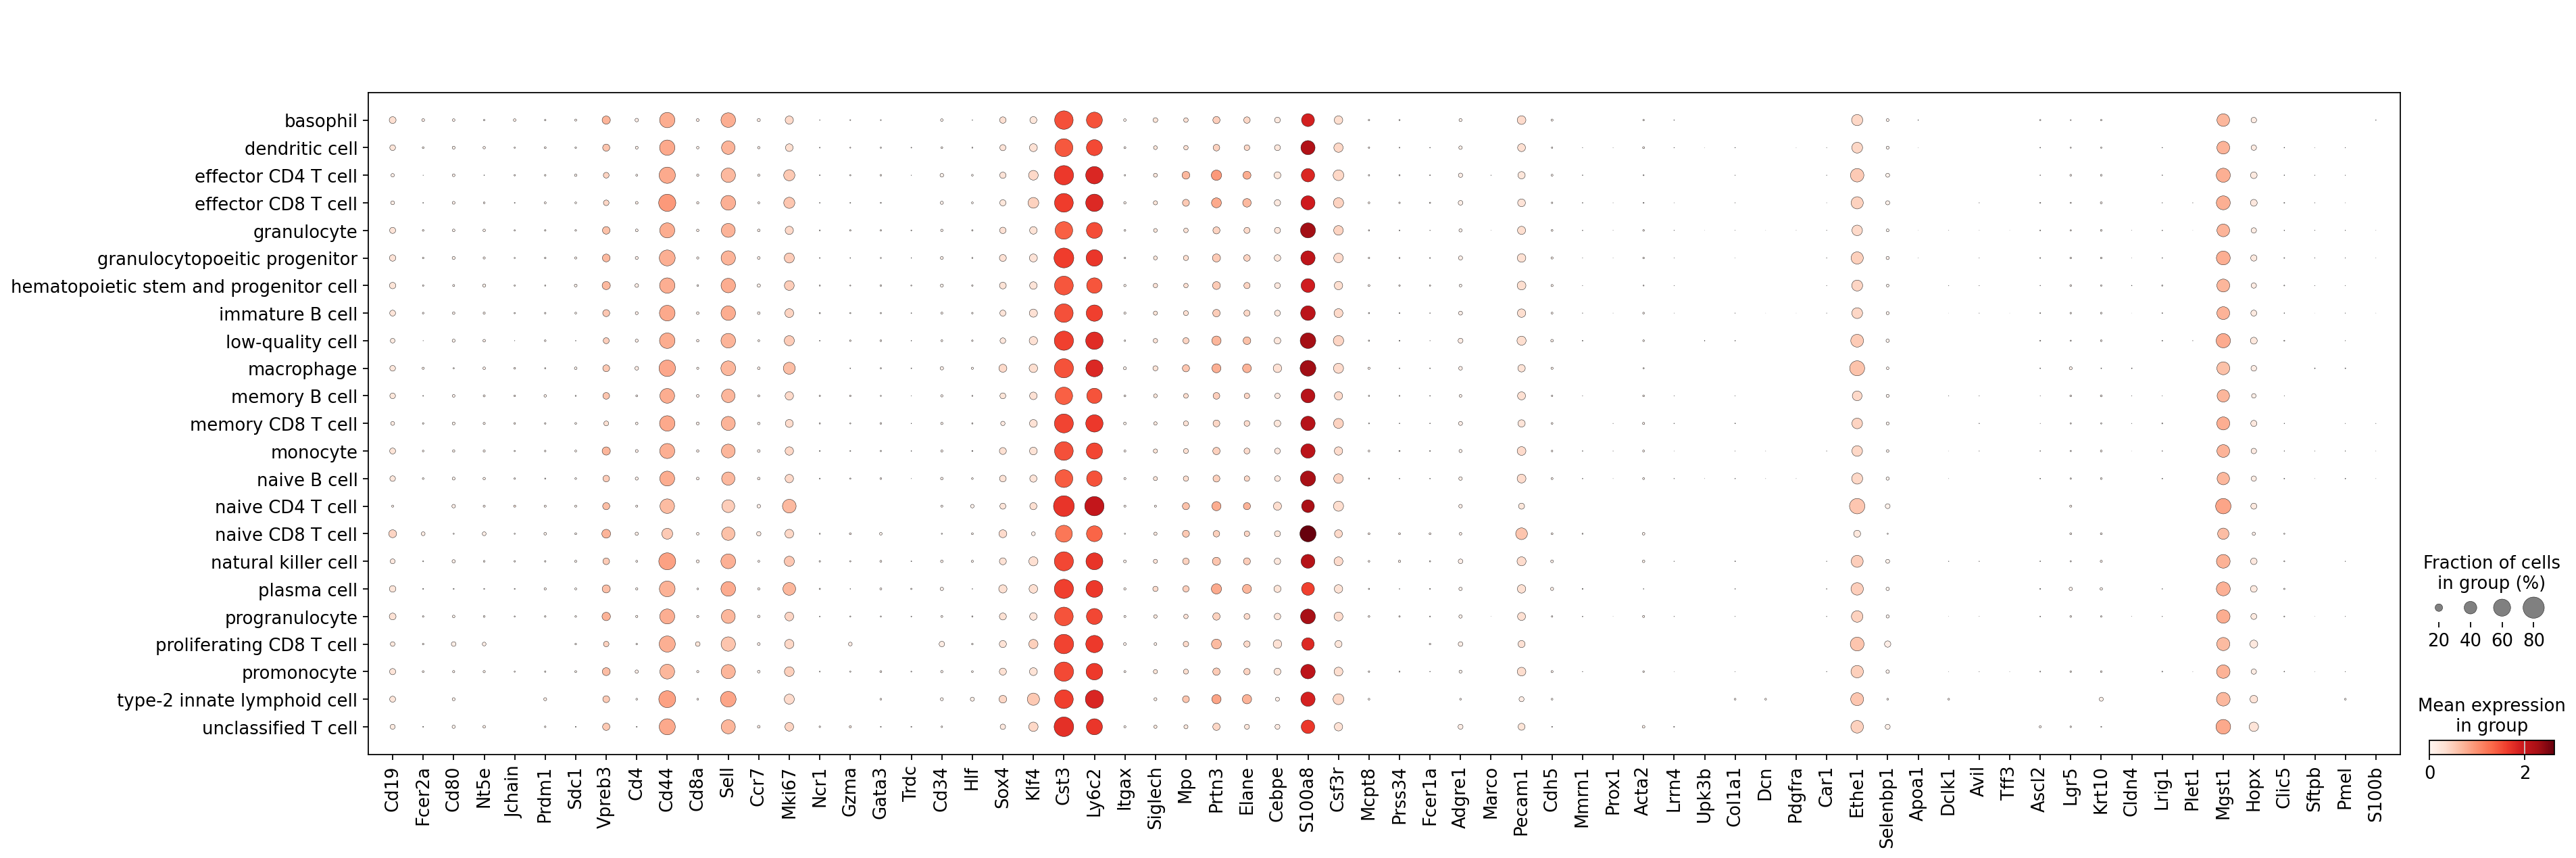

In [648]:
sc.pl.dotplot(adata, marker_genes, groupby="annotation_lv2")


/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_stacked_violin.py:324: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  _color_df = _matrix.groupby(level=0).median()
/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_stacked_violin.py:462: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  row_ax = sns.violinplot(
/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_stacked_violin.py:462: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  row_ax = sns.violinplot(
/mbshome/bvdbe

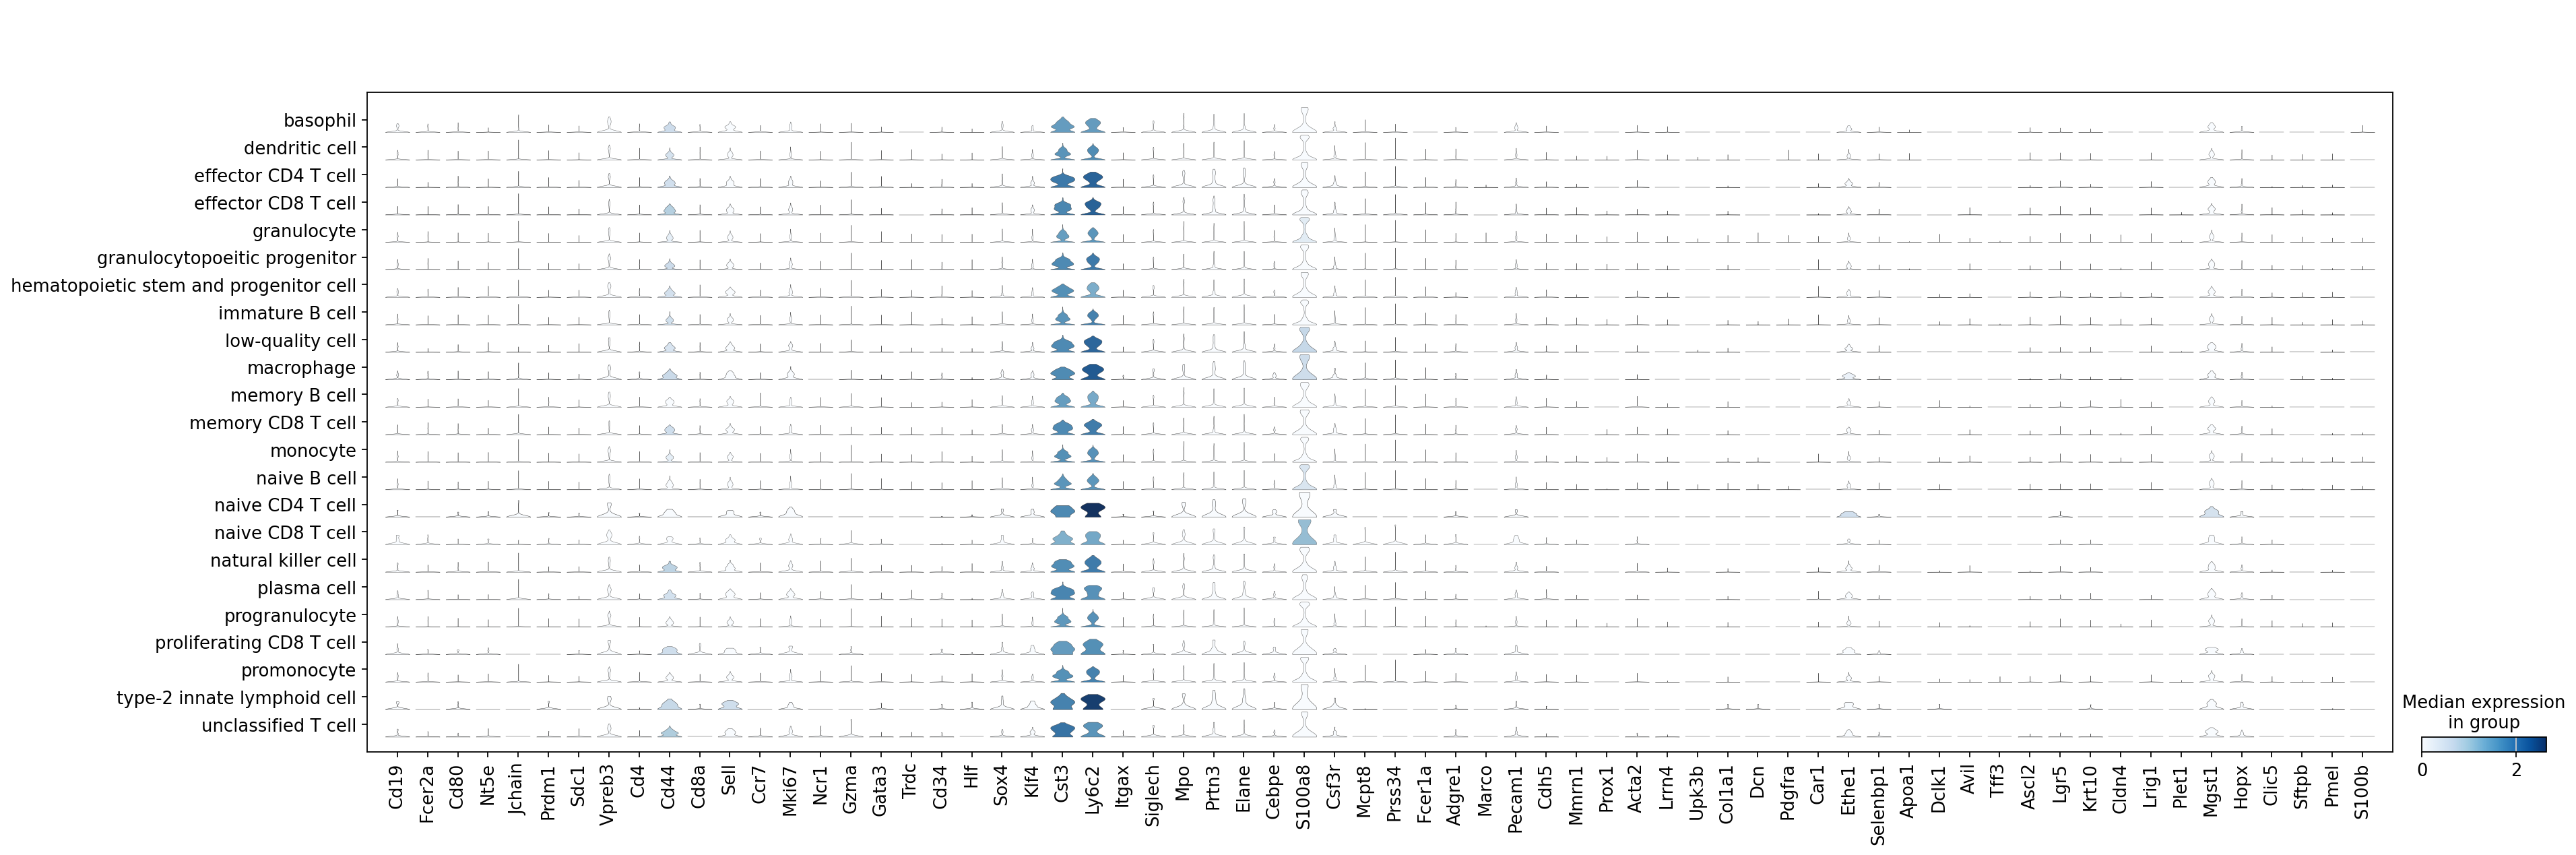

In [649]:
sc.pl.stacked_violin(adata, marker_genes, groupby="annotation_lv2")


AnnData object with n_obs × n_vars = 14434 × 5961
    obs: 'nCount_RNA', 'nFeature_RNA', 'sampleID', 'tissue', 'model', 'age', 'model_age', 'mouseID', 'doublet_scores', 'percent.mt', 'percent.ribo', 'percent.hb', 'percent.hist', 'S.Score', 'G2M.Score', 'group_umap_sub', 'annotation_lv0', 'annotation_lv1', 'annotation_lv2', 'annotation_lv3', 'phase', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'louvain', 'leiden'
    var: 'te_type', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'louvain', 'louvain_colors', 'louvain_sizes', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
te_type
GENE    4438
LTR      598
SINE     578
LINE     318
DNA       29
Name: count, dtype: int64


<Axes: ylabel='count'>

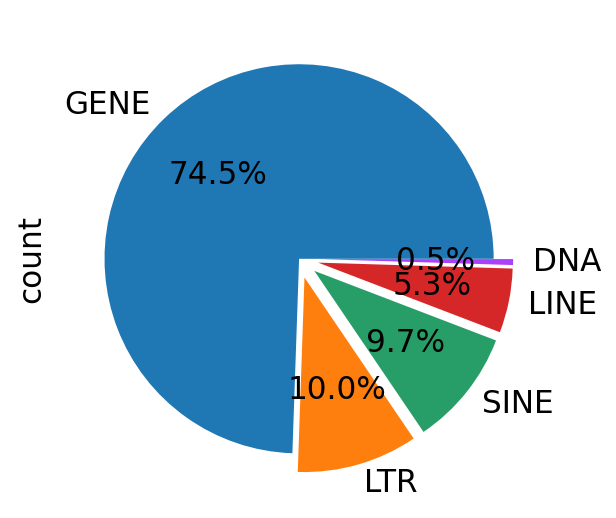

In [662]:
print(adata)
te_counts2 = adata.var["te_type"].value_counts()
print(te_counts2)
te_counts2.plot.pie(autopct='%1.1f%%', explode=(0, 0.1, 0.1, 0.1, 0.1))


In [ ]:
te_dict = adata.var['te_type']
te_dictio = te_dict.to_dict()

new_dict = {}
for key, value in te_dictio.items():
   if value in new_dict:
       new_dict[value].append(key)
   else:
       new_dict[value]=[key]
       
new_dict


In [ ]:
sc.pl.umap(adata, new_dict, 'mouseID')
